<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/Trained_models/TF2_0_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix


print(tf.__version__)

2.12.0


In [3]:

# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Get list of available functions and attributes
# Count the number of functions in the list
# Print the number of functions


# Load the data and labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


print("Train images shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
     

170498071/170498071 [==============================] - 9s 0us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [4]:
# Number of classes
K = len(set(y_train))

print("Number of Classes:", K)

# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

Number of Classes: 10


In [5]:
# Compile and fit
# NOTE: make shure you're using the GPU for this!
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5576 - accuracy: 0.4344 - val_loss: 1.2630 - val_accuracy: 0.5469
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2685 - accuracy: 0.5433 - val_loss: 1.1596 - val_accuracy: 0.5841
Epoch 3/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1371 - accuracy: 0.5949 - val_loss: 1.0360 - val_accuracy: 0.6312
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0499 - accuracy: 0.6242 - val_loss: 0.9625 - val_accuracy: 0.6597
Epoch 5/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9722 - accuracy: 0.6544 - val_loss: 0.9271 - val_accuracy: 0.6761
Epoch 6/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9103 - accuracy: 0.6766 - val_loss: 0.9021 - val_accuracy: 0.6916
Epoch 7/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8574 - accuracy: 0.6957 - val_loss: 0.8708 -

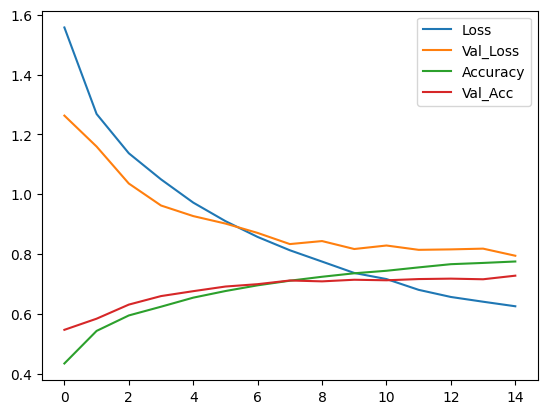

In [6]:
# Plot Loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

# Plot Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Acc')
plt.legend()

313/313 [==============================] - 4s 11ms/step
Confusion Matrix, without normalization
[[760  22  47  14  10   0  13   6  98  30]
 [  7 858  12   6   3   4  12   1  32  65]
 [ 73  12 638  57  71  42  73  11  17   6]
 [ 25   5  77 570  51 130  94  17  18  13]
 [ 26   3  78  69 681  30  73  27  11   2]
 [ 16   7  65 258  51 521  52  17   9   4]
 [  4   8  40  53  22  14 842   4   8   5]
 [ 16   2  38  61  72  53  14 720   6  18]
 [ 34  20   9  14   4   1   4   3 892  19]
 [ 27  80  10  19   6   6   8   9  38 797]]


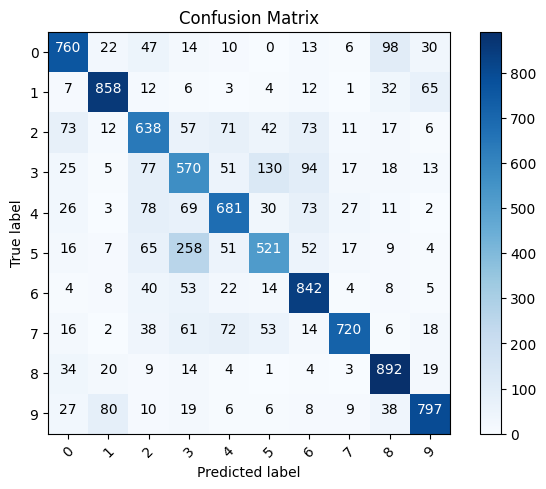

In [7]:
# Plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=true'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  plt.imshow(cm , interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color='white' if cm[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [8]:
# Label Mapping 
labels = '''Airplane
  Automobile
  Bird
  Cat
  Deer
  Dog
  Frog
  Horse
  Ship
  Truck'''.split()


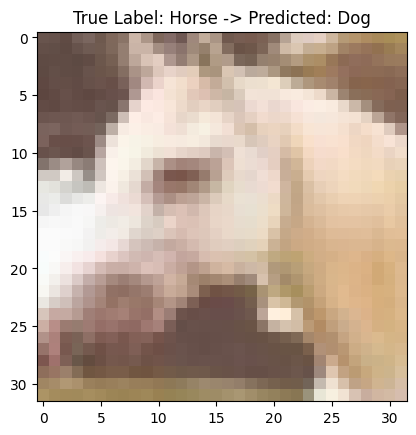

In [17]:
# Show some misclassified expamples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s -> Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [18]:
# SAVING this into in a FILE Path
model.save('TF2.0_CIFAR10.h5')

In [19]:
# Checking if the file exists
!ls -1h

sample_data
TF2.0_CIFAR10.h5
